# AI/ ML project
To develop and deploy a solution using AI. Train a deep learning image classification model that is able to recognise the classifications of the car images.

<b>Dataset</b> (Stanford Cars Dataset) is downloaded from [Kaggle (images)](https://www.kaggle.com/datasets/peterjun/car196) and [Kaggle (mat file)](https://www.kaggle.com/datasets/jessicali9530/stanford-cars-dataset), as the [Standford link](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) for this dataset is inactive. I have also tried to download with [tensorflow](https://www.tensorflow.org/datasets/catalog/cars196) to no avail as the standford link is down. The images files were already split into test and train folders.

For this project I have chosen to work on Tensorflow framework instead of Pytorch as I'm more familiar with Tensorflow, also I have chosen to use a pre-trained open-source classifier models as it helps to reduce development time and resources. 

I'll start this project off by looking at the different pretrained models. I'm looking at several models of which to be used for this project:
- Lenet (1998) ([Source](https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/))
    - 5 layers with learnable parameters
    - 3 convolution layers with a combination of average pooling
    - 2 fully connected layers
    - softmax classifier
- AlexNet (2012) ([Source](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/))
    - 8 layers with learnable parameters
    - 5 layers with a combination of max pooling
    - 3 fully connected layers using Relu activation except the output layer.
- VGG16 (2014) ([Source](https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/#h-very-deep-convolutional-networks-for-large-scale-image-recognition-vgg-16))
    - 13 Convolutional Layers
    - 5 Pooling Layers
    - 3 Dense Layers
- MobileNetV3 (2019)
    - two version - large and small ([paper Source](https://arxiv.org/pdf/1905.02244v5))
    - training small version on my computer would be more suitable ([code Source](https://github.com/xiaolai-sqlai/mobilenetv3/blob/adc0ca87e1dd8136cd000ae81869934060171689/mobilenetv3.py#L75))
- EfficientNet (2019) ([Source](https://arxiv.org/abs/1905.11946v5))
    - scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. ([Source](https://paperswithcode.com/method/efficientnet))
- SLCA++ (2023) ([Source](https://arxiv.org/abs/2408.08295))
    - Slow Learner (SL): This component selectively reduces the learning rate of backbone parameters to balance the retention of pre-trained knowledge with the acquisition of new task-specific information. 
    - Classifier Alignment (CA): CA aligns disjoint classification layers in a post-hoc manner by modeling class-wise distributions, thereby mitigating biases between tasks or classes.
    - <b>From my understanding</b> SLCA relies on a pre-trained backbone model to extract features so either EfficientNet, MobileNet or resNet; Probably not going to experiment with this till i understand the topic better.

From this short reading, my understanding from model VGG16 to older models are outdated and was consider a break through when they were introduced but currently standards should be efficientNet and MobileNet.

### MobileNetV3 on ImageNet
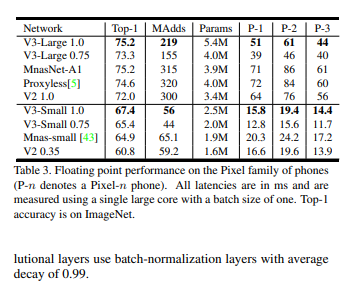

### EfficientNet on ImageNet
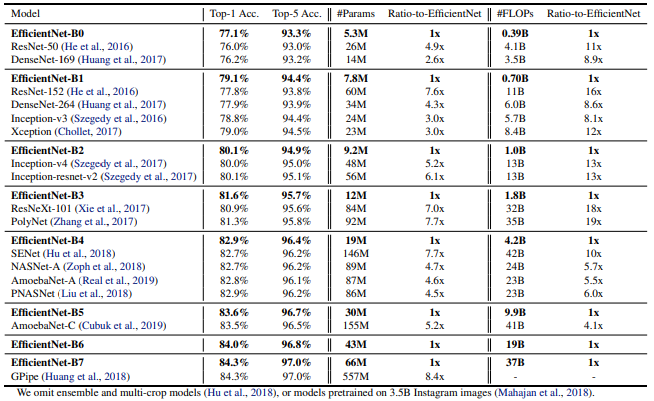

### SLCA++ on ImageNet
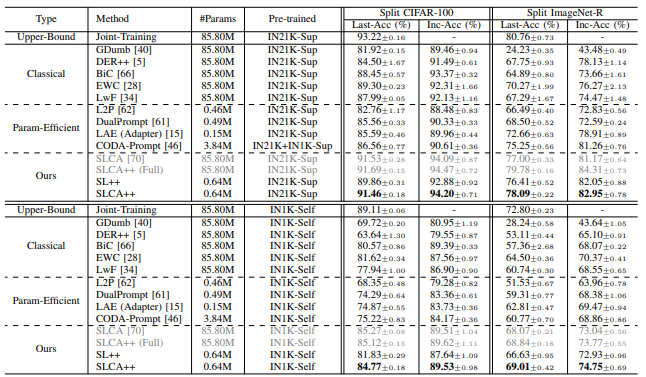

### My computer specs:
- NVIDIA GeForce RTX 3060 Ti
- AMD Ryzen 5 5600X 6-Core
- 16GB ram

I have decided to choose EfficientNet-B0 as the 5M params is pretty lighweight for my small GPU, thou MobileNetV3 have around the same or less params the accuracy doesn't seems to be much better than Efficient b0 so for this project i'll test out EfficientNet-B0 and if i have time i would like to test the other models too. 


### Install libraries

### Importing Libraries

In [1]:
pip install scipy torch torchvision tensorflow_datasets matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.io, h5py, os, torch, torchvision, glob, re, keras, os, json
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Sequential, Model, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torchvision.datasets.utils import download_url

# Data Preprocessing

In [3]:
# loading the mat file
data = scipy.io.loadmat("data/cars_annos.mat")

looking through tfds to download for car196 dataset

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

Tried to download dataset using tfds, but it returns a 404 error.

In [5]:
# ds = tfds.load('cars196', split='train', shuffle_files=True)
# assert isinstance(ds, tf.data.Dataset)
# print(ds)

Looking through the mat file

In [6]:
# checking the keys of the mat file
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])


In [7]:
# looking through all the keys
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015'

In [8]:
data['__version__']

'1.0'

In [9]:
data['__globals__']

[]

In [10]:
data['annotations']

array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
        ...,
        (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
        (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([

In [11]:
# finding what's the type of data in annotation
print(data['annotations'][0].dtype)

[('relative_im_path', 'O'), ('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('test', 'O')]


In [12]:
data['class_names']

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

Extracting the information in annotations

In [13]:
annotations = data['annotations'][0]  # Array of all entries
img_num = np.array([entry['relative_im_path'][0].split('/')[-1].split('.')[0] for entry in annotations])
bbox_x1 = np.array([entry['bbox_x1'][0][0] for entry in annotations])
bbox_y1 = np.array([entry['bbox_y1'][0][0] for entry in annotations])
bbox_x2 = np.array([entry['bbox_x2'][0][0] for entry in annotations])
bbox_y2 = np.array([entry['bbox_y2'][0][0] for entry in annotations])
classes = np.array([entry['class'][0][0] for entry in annotations]) - 1  # Adjust to 0-based indexing
test_flags = np.array([entry['test'][0][0] for entry in annotations])

making sure that the length of all the list matches 

In [14]:
print(len(img_num))
print(len(bbox_x1))
print(len(bbox_y1))
print(len(bbox_x2))
print(len(bbox_y2))
print(len(classes))
print(len(test_flags))

16185
16185
16185
16185
16185
16185
16185


checking if the images downloaded matches annotations, and split the images according to train and test folders.

#### 1 is for Training data
#### 2 is for Testing data

TrainTestSplit will save which folder the img is located and the location (E.g.): \
[[1, 'data/cars196/train\\AM General Hummer SUV 2000\\000001.jpg']

this process takes up time when running the program, so i decided to store the information in a txt file to save time.

In [16]:
dataset_path_train = "data/cars196/train/"
dataset_path_test = "data/cars196/test/"
output_file = "data/train_test_split.txt"  # Output file path

trainTestSplit = []
trainNo = 0
testNo = 0

if os.path.exists(output_file):
    # If the output file exists, read from it
    print(f"File {output_file} exists. Loading data...")
    with open(output_file, "r") as f:
        for line in f:
            split_type, path = line.strip().split("\t")
            trainTestSplit.append([int(split_type), path])
            if int(split_type) == 1:
                trainNo += 1
            elif int(split_type) == 2:
                testNo += 1
else:
    # If the output file doesn't exist, generate the split
    print(f"File {output_file} does not exist. Generating train-test split...")
    for path in img_num:
        train_path = glob.glob(os.path.join(dataset_path_train, '*/', path + '.jpg'))
        test_path = glob.glob(os.path.join(dataset_path_test, '*/', path + '.jpg'))
        if train_path:
            train_path = train_path[0].replace("\\", "/")
            trainTestSplit.append([1, train_path])
            print(f"Image found in train: {train_path}")
            trainNo += 1
        elif test_path:
            test_path = test_path[0].replace("\\", "/")
            trainTestSplit.append([2, test_path])
            print(f"Image found in test: {test_path}")
            testNo += 1
        else:
            trainTestSplit.append([0, path + '.jpg'])
            print(f"Image not found: {path}.jpg")
    
    # Save to a text file
    os.makedirs("data", exist_ok=True)  # Ensure the 'data' directory exists
    with open(output_file, "w") as f:
        for entry in trainTestSplit:
            f.write(f"{entry[0]}\t{entry[1]}\n")
    print(f"Saved train-test split information to {output_file}")

# Check total count
total_count = len(trainTestSplit)
if total_count == 16185:
    print("Total images match the expected count of 16185.")
else:
    print(f"Total images: {total_count}, which is not the expected count of 16185.")

# Print summary
print(f"Number of Training imgs: {trainNo}\nNumber of Testing imgs: {testNo}\nTotal: {trainNo + testNo}")

File data/train_test_split.txt does not exist. Generating train-test split...
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000001.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000002.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000003.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000004.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000005.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000006.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000007.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000008.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000009.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000010.jpg
Image found in train: data/cars196/train/AM General Hummer SUV 2000/000011.jpg
Image found in train: data/cars196/train/AM General H

checking for missing images and the length of the new list.

In [ ]:
if any(value == 0 for value in trainTestSplit):
    print("The list contains the value 0.")
else:
    print("The list does not contain the value 0.")
# check len to match previous lists
print(len(trainTestSplit))

In [ ]:
# checking the list
print(trainTestSplit[0])

I understand that this dataset have 196 unique cars but I want to check the data and make sure it has the same number of unique cars as my prior knowledge on this dataset. After finishing the reggex I realised I could have just count the numbers of folders...

In [ ]:
# Create a set to store unique car names
unique_car_names = set()

# Iterate through each entry in the list
for entry in trainTestSplit:
    path = entry[1]
    # Use regex to find text between backslashes
    match = re.search(r'\\(.*?)\\', path)
    if match:
        car_name = match.group(1)
        unique_car_names.add(car_name)
        entry.append(car_name)

# Get the count of unique car names
unique_car_count = len(unique_car_names)
print(unique_car_count)

In [ ]:
print(unique_car_names)

In [ ]:
print(trainTestSplit[770])

### Convert everything into a list - to be converted into a dataset
The img data I downloaded was already split, I'll just use it as it is and split the training and testing data according to the folders.

In [ ]:
train_image_paths = []
train_labels = []

test_image_paths = []
test_labels = []

for i, entry in enumerate(trainTestSplit):
    if entry[0] == 1: 
        train_image_paths.append(entry[1])
        train_labels.append(entry[2])
    elif entry[0] == 2:
        test_image_paths.append(entry[1])
        test_labels.append(entry[2])

### Pre-train model with imageNet
After going through two articles on pre-train model I realised I had a misconception about pre-train models from its name - pre-trained models might interfer with the results of the output negatively due to it being trained in other aspect. But from what i have read it improves the models in a way that decrease the training time while being smaller than 'state-of-the-art' moodels. ([Article 1](https://arxiv.org/pdf/2104.00298))  Having pre-trained models is not a necessity but can be helpful on smaller data (less than 10k images). ([Article 2](https://openaccess.thecvf.com/content_ICCV_2019/papers/He_Rethinking_ImageNet_Pre-Training_ICCV_2019_paper.pdf))



Used this to check image size - almost all the images have different sizes

In [ ]:
# sizeDict = {}
# for Type, Path, car in trainTestSplit:
#     img = Image.open(Path)
#     width = img.width
#     height = img.height
#     if f"{height}.{width}" not in sizeDict:
#         sizeDict.update({f"{height}.{width}":1})
#     else:
#         sizeDict[f"{height}.{width}"] += 1

# print(sizeDict)

In [ ]:
# For EfficientNet-B0 the size of the image is 224x224
IMG_SIZE = 224
BATCH_SIZE = 64

Create tensorflow dataset from image paths and labels

In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
ds_test = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))

Using LabelEncoder to encode the labels to a corresponding number

In [ ]:
# Convert the set to a list
label_list = list(unique_car_names)
sorted(label_list) 

# Fit LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(label_list)

# Get the mapping between labels and numbers
label_to_number = dict(zip(label_list, label_encoder.transform(label_list)))
# Sort by value (ascending)
sorted_dict = dict(sorted(label_to_number.items(), key=lambda item: item[1]))
# save the dict to a txt file
with open('data/label_to_number.txt', 'w') as file:
    for key, value in sorted_dict.items():
        file.write(f"{key}: {value}\n")

print(label_to_number)

In [ ]:
# Function to load and preprocess images and label
def load_and_preprocess_image(image_path, label, target_size=(224, 224)):
    image = tf.io.read_file(image_path) # Load
    image = tf.image.decode_jpeg(image, channels=3) # Decode
    image = tf.image.resize(image, target_size) # Resize
    image = image / 255.0 # Normalize
    
    # convert string label to int
    label_number = tf.py_function(func=lookup_label, inp=[label], Tout=tf.int32)
    # Make sure label is scalar
    label_number = tf.reshape(label_number, ())
    
    return image, label_number

def lookup_label(label):
    # Convert Tensor label to Python string
    label_str = label.numpy().decode('utf-8')
    # Look up the label in the dictionary
    return label_to_number[label_str]

In [ ]:
# Apply preprocessing to the dataset
target_size = (224, 224)
ds_train = ds_train.map(lambda image_path, label: load_and_preprocess_image(image_path, label, target_size))
ds_test = ds_test.map(lambda image_path, label: load_and_preprocess_image(image_path, label, target_size))

In [ ]:
ds_train = ds_train.shuffle(buffer_size=len(train_image_paths)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

### Data augmentaion
preprocessing layers APIs for image augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
])

# Applying augmentation directly to the training set
ds_train = ds_train.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)  # Add augmentation here
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(unique_car_count, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train Model
when running the first epoch, i realised my computer's CPU was running at 100% and feels like it could crash any time (music was stuttering in the background, everything became less responsive), so i decided to follow this [link](https://saturncloud.io/blog/how-to-run-jupyter-notebook-on-gpus/#1) to run jupyter notebook on my GPU instead.

In [ ]:
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=unique_car_count,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

epochs = 40  
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test)

In [ ]:
model.save_weights("models/first_1.weights.h5")